In [14]:
import os

def adjust_wkdir(cut_folder='notebook'):
    abspath = os.path.abspath('.')
    wk_dir = abspath.replace(cut_folder,'')
    os.chdir(wk_dir)
    return wk_dir


adjust_wkdir()
!pwd 

/share/felix/pj/fine_grained_neumonia_classification


In [2]:
import matplotlib.pyplot as plt
from glob import glob

In [3]:
from dataset.dataLoader import dataLoader
from configurations.paths import paths, file_names

from dataset.splitDataset import getIndicesTrainValidTest
train_indices, valid_indices, test_indices = getIndicesTrainValidTest()
dataroot = os.path.join(paths['data']['datainfo_path'], file_names['data']['data_hdf5_file'])
train_loader, valid_loader, test_loader, cls_weights = \
        dataLoader(dataroot, train_indices, valid_indices, test_indices, 2, batch_size=2, trans=True)

160
0 128
128 144
Total number of patients (train + valid + test) :160
Patient count in train set:128
Patient count in valid set:16
Patient count in test set:16
Images count in Train set:23387
Images count in Valid set:3072,
Images count in Test set:3042


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<class 'torch.Tensor'> tensor([1, 1]) torch.Size([2, 3, 448, 448]) <class 'torch.Tensor'>


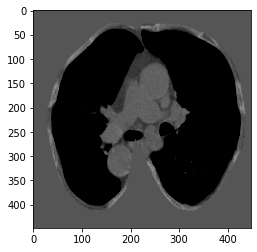

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<class 'torch.Tensor'> tensor([1, 0]) torch.Size([2, 3, 448, 448]) <class 'torch.Tensor'>


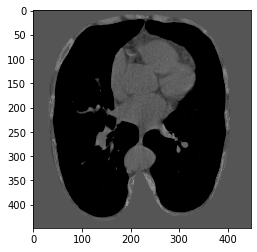

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<class 'torch.Tensor'> tensor([0, 0]) torch.Size([2, 3, 448, 448]) <class 'torch.Tensor'>


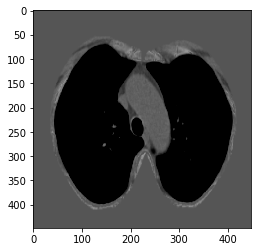

In [4]:
for i, (data, target)  in enumerate(train_loader):
    print(type(target), target, data.shape, type(data[0]))
    data_trans = data[1].numpy().transpose((1,2, 0))
    #print(data_trans.shape)
    #print(data_trans.shape)
    plt.imshow(data_trans)
    plt.show()
    if i > 1 : break
        


In [5]:
import numpy as np
a = np.ones((2,3,4))
a.transpose(0,2,1).shape

(2, 4, 3)

In [6]:

for sn, file in enumerate(glob('./vis_result/80/*')):
    print(file)
    plt.figure(figsize = (9,9))
    tmp = plt.imread(file)
    plt.imshow(tmp)
    plt.show()
    if sn > 1:
        break


./input/sample/003.dcm
7764 200202089


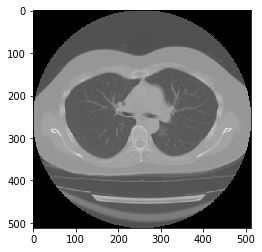

./input/sample/014.dcm
7764 200202089


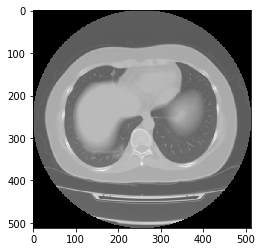

./input/sample/001.dcm
7764 200202089


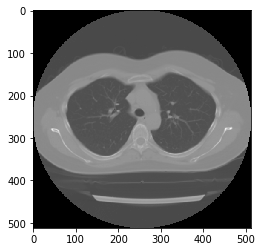

./input/sample/000.dcm
7764 200202089


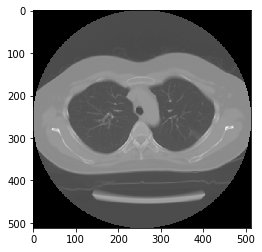

./input/sample/012.dcm
7764 200202089


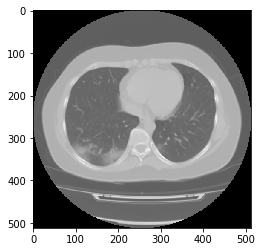

./input/sample/013.dcm
7764 200202089


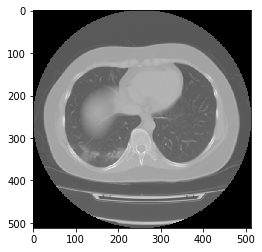

./input/sample/015.dcm
7764 200202089


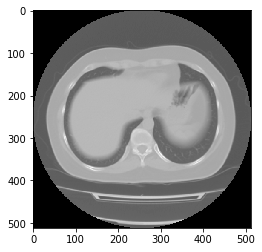

./input/sample/002.dcm
7764 200202089


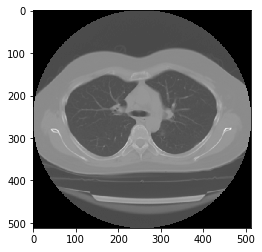

In [18]:
import pydicom
from glob import glob
for file in glob('./input/sample/*.*'):
    print(file)
    ds = pydicom.dcmread(file, force=True)
    ds.file_meta.TransferSyntaxUID = pydicom.uid.ImplicitVRLittleEndian
    img = ds.pixel_array
    print(ds.StudyID, ds.PatientID)
    plt.imshow(img, cmap='gray')
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


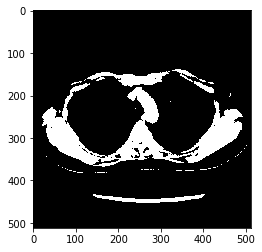

1486


In [174]:
file = './input/sample/000.dcm'
ds = pydicom.dcmread(file, force=True)
ds.file_meta.TransferSyntaxUID = pydicom.uid.ImplicitVRLittleEndian
img = ds.pixel_array
xx = np.zeros((512,512, 3))
xx[:,:,0] = img
xx[:,:,1] = img
xx[:,:,2] = img

plt.imshow(xx)
plt.imshow(xx)
plt.show()
print(img.max())

#gray = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

# tmp_pth = './output/tmp/xx.jpg'
# os.makedirs(os.path.dirname(tmp_pth),exist_ok=True)
# plt.imsave(tmp_pth,img,cmap='gray')
    
# img = plt.imread(tmp_pth) 
# print(img.shape)
# plt.imshow(img, cmap='gray')
# plt.show()
# print(img.max())
 
 

 

In [166]:
plt.imsave?

In [158]:
plt.imsave?

In [142]:
dir(img)

['_Image__transformer',
 '__array_interface__',
 '__class__',
 '__copy__',
 '__del__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_close_exclusive_fp_after_loading',
 '_copy',
 '_crop',
 '_dump',
 '_ensure_mutable',
 '_exif',
 '_expand',
 '_new',
 '_repr_png_',
 '_size',
 'alpha_composite',
 'category',
 'close',
 'convert',
 'copy',
 'crop',
 'draft',
 'effect_spread',
 'encoderconfig',
 'encoderinfo',
 'entropy',
 'filter',
 'format',
 'format_description',
 'frombytes',
 'fromstring',
 'getbands',
 'getbbox',
 'getchannel',
 'getcolors',
 'getdata',
 'getexif',
 'getextrema',
 'getim',
 'getpalette',
 'getpixel',


In [134]:
success, a_numpy = cv2.imencode('.jpg', img)
print(img.shape, a_numpy.shape, a_numpy.max(), img.max(), type(a_numpy), 512*512)
#xx = Image.fromarray()

plt.imshow(a_numpy.reshape(img.shape) )

(512, 512) (27044, 1) 255 1486 <class 'numpy.ndarray'> 262144


ValueError: cannot reshape array of size 27044 into shape (512,512)

In [219]:
from PIL import Image
Image.save()

AttributeError: module 'PIL.Image' has no attribute 'save'

In [16]:
! ls ./input/sample/*.*

./input/sample/000.dcm	./input/sample/003.dcm	./input/sample/014.dcm
./input/sample/001.dcm	./input/sample/012.dcm	./input/sample/015.dcm
./input/sample/002.dcm	./input/sample/013.dcm


In [237]:
import uuid

def predict_images(model, imgs, filters=3, output='./output'):
    """Implement: use model to predict images and draw ten boxes by POOL6
     path to images need to predict is in './dataset/bird'

     result : directory to accept images with ten boxes
     subdirectory is epoch, e,g.0,1,2...

     index2classlist : transform predict label to specific classname
     """
    
    result = []
    fold = f'{output}/{uuid.uuid4()}'
    os.makedirs(fold)
    imgs = imgs if isinstance(imgs, list) else [imgs]
    
    for sn, img in enumerate(imgs):
        out_file = f'{fold}/{sn}.jpg'
        plt.imsave(out_file,img,cmap='gray')
        img = Image.fromarray(img)
        
        #plt.imshow(img,cmap='gray')
        #plt.show()
        #img = np.squeeze(img, axis=0)
        

        # img_path = os.path.join(path_img, '{}.jpg'.format(original))

        # transform1 = get_transform()       # transform for predict
        transform2 = transform_onlysize()
        # img = Image.open(img_path)
        # img_pad = transform2(img)
        # img_tensor = transform1(img)
        # img_tensor = data.unsqueeze(0)
        
        out1, out2, out3, indices = model(transform2(img).unsqueeze(0))
        
        #print(out1, out2, out3, indices)
        
        out = out1 + out2 + 0.1 * out3
        # img = transform1(img)
        
        value, index = torch.max(out.cpu(), 1)
        #print(out.cpu())
        vrange = np.arange(0, filters)
        # select from index - index+9 in 2000
        # in test I use 1st class, so I choose indices[0, 9]
        idx = int(index[0])
        
        img = Image.open(out_file)
        for i in vrange:
            indice = indices[0, i]
            row, col = indice / 56, indice % 56
            p_tl = (8 * col, 8 * row)
            p_br = (col * 8 + 92, row * 8 + 92)
            img = img.convert('RGB')

            draw = ImageDraw.Draw(img)
            draw.rectangle((p_tl, p_br), outline='red', width=3)
        #TODO replace with real prediction
        result.append((0.88, out_file))
        print(type(img))
        img.save(out_file)
        
    return result





<class 'PIL.Image.Image'>
0.88


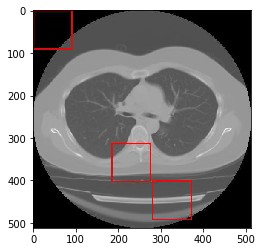

In [240]:
import pydicom
from glob import glob
from PIL import Image, ImageFont, ImageDraw
from drawrect import *
imgs = []
for file in glob('./input/sample/*.*'):
    #print(file)
    ds = pydicom.dcmread(file, force=True)
    ds.file_meta.TransferSyntaxUID = pydicom.uid.ImplicitVRLittleEndian
    img = ds.pixel_array
    #print(img.shape)
    imgs.append(img) 
    break
    

from model.DFL import *
model = DFL_VGG16(k = 3, nclass = 2)

res = predict_images(model, imgs )

for predict, img_path in res:
    print(predict)
    plt.imshow(plt.imread(img_path))
    plt.show()